In [195]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st

In [196]:
dt1 = pd.read_csv("dt1.csv")
dt2 = pd.read_csv("dt2.csv")
signalx = pd.read_csv("signal_x.csv")
signaly = pd.read_csv("signal_y.csv")

In [197]:
signaly.rename(columns={"x": "y"}, inplace = True)
dt1['mid'] = dt1['mid'].apply(lambda x: x/100)
dt2['mid'] = dt2['mid'].apply(lambda x: x/100)

In [198]:
signalXY = pd.DataFrame()

In [199]:
signalXY['xy'] = -signaly['y']+signalx['x']

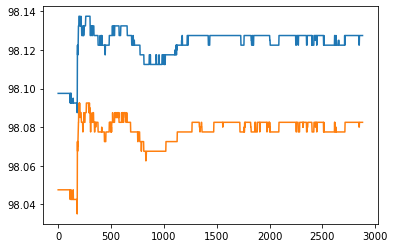

In [200]:
plt.plot(dt1['mid'])
plt.plot(dt2['mid'])

In [201]:
######

In [202]:
xyPosProfit = []
xyNegProfit = []
lag = 1
for i in range(len(signalXY['xy'][:-lag])):
    x0 = dt1['mid'][i]
    y0 = dt2['mid'][i]
    x1 = dt1['mid'][i+lag]
    y1 = dt2['mid'][i+lag]
    profitPos = (y0-y1)+(x1-x0)
    profitNeg = (x0-x1)+(y1-y0)
    xyPosProfit.append(profitPos)
    xyNegProfit.append(profitNeg)
    

In [203]:
len(xyPosProfit)

2879

In [204]:
xyProfit = []
for i in range(len(xyPosProfit)):
    xyProfit.append(xyPosProfit[i])

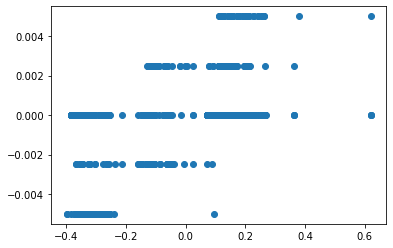

In [205]:
plt.scatter(signalXY['xy'][:-lag], xyProfit)

In [206]:
st.pearsonr(signalXY['xy'][:-lag], xyProfit)

(0.3090041115594069, 9.686088166047774e-65)

In [207]:
negSignal = []
negxyProfit = []
for i in range(len(xyProfit)):
    if (signalXY['xy'][i] < 0):
        negSignal.append(signalXY['xy'][i])
        negxyProfit.append(xyProfit[i])

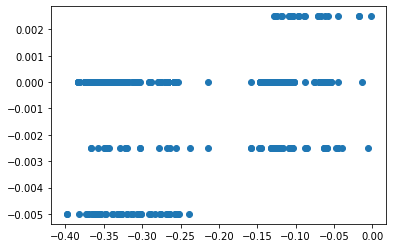

In [208]:
plt.scatter(negSignal, negxyProfit)

In [209]:
st.pearsonr(negSignal, negxyProfit)

(0.17320169431421256, 3.4488850659856906e-06)

In [210]:
#detour

In [211]:
posSignal = []
posxyProfit = []
for i in range(len(xyProfit)):
    if (signalXY['xy'][i] > 0):
        posSignal.append(signalXY['xy'][i])
        posxyProfit.append(xyProfit[i])

In [212]:
st.pearsonr(posSignal, posxyProfit)

(0.12693852738911718, 2.9844383093752187e-09)

In [213]:
posRefSignal = []
posRefxyprofit = []
for i in range(len(posSignal)):
    posRefSignal.append(posSignal[i]*-1)
    posRefxyprofit.append(posxyProfit[i]*-1)

In [214]:
st.pearsonr(posRefSignal, posRefxyprofit)

(0.12693852738911718, 2.9844383093752187e-09)

In [215]:
reg = st.linregress(signalXY['xy'][:-lag], xyProfit)
reg

LinregressResult(slope=0.0019129787538428352, intercept=-9.970558829888149e-05, rvalue=0.30900411155940505, pvalue=9.686088166063029e-65, stderr=0.0001097701340427865)

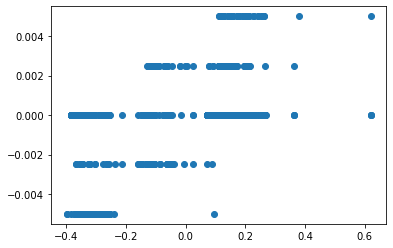

In [216]:
plt.scatter(signalXY['xy'][:-lag], xyProfit)

In [217]:
linrX = [-0.4,0.2,0,0.2,0.4,0.6]
linrY = []
for x in linrX:
    linrY.append(x*reg[0]+reg[1])

In [218]:
#make this plot fancier -> add error bars and legend and include in writeup

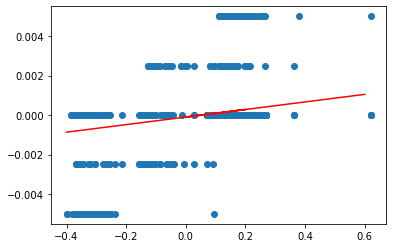

In [219]:
plt.scatter(signalXY['xy'][:-lag], xyProfit)
plt.plot(linrX,linrY, color='r')

(array([ 326.,   71.,  225.,   89.,  550., 1386.,  224.,    5.,    0.,
           4.]),
 array([-0.39853787, -0.29663264, -0.19472741, -0.09282218,  0.00908304,
         0.11098827,  0.2128935 ,  0.31479873,  0.41670396,  0.51860919,
         0.62051442]),
 <a list of 10 Patch objects>)

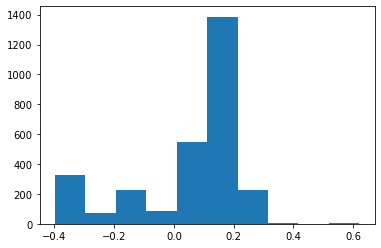

In [220]:
plt.hist(signalXY['xy'])